<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
پاییز ۱۳۹۸
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
پاسخ تمرین عملی بخش ششم
            	<br/>
			</font>
طراح: ارشیا مقیمی 
			<br/><br/> 
                <br/>
        </style>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            سوال اول (بازه‌ی بدیهی)
        </font>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:300%;text-align:justify">
	<font face="XB Zar" size=5>
یک نمونه‌ی ۱۰۰۰ تایی از توزیع $N(1,4)$ تولید کنید. سپس یک بازه‌ی اطمینان ۹۹٪ی برای $\sigma^2$ به دست آورید.
            </font>
</div>
    </font>
</div>

In [33]:
n <- 1000
mu <- 1
sigma <- 2
alpha <- 0.01

Z <- rnorm(n,mu,sigma)
s2 <- var(Z)
c.left <- qchisq(alpha/2, n-1)
c.right <- qchisq(1-alpha/2, n-1)
confint <- (n-1)*s2/c(c.right, c.left )
confint

[1] 3.201798 4.032419

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            سوال دوم (بایاس یا واریانس، مسئله این است)
        </font>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:300%;text-align:justify">
	<font face="XB Zar" size=5>
        الف. قطعه کد زیر را تحلیل کنید و نمودار $MSE$ و $bias^2$ و $variance$ را بر حسب $shrink$ رسم کنید.
<br>
    تحلیل: یک نمونه‌ی ۱۰۰۰۰تایی به ۱۰۰۰ دسته تقسیم شده و برای هر دسته، مقدار واریانس و بایاس و MSE محاسبه می‌شود. 
        
</form>
</font>
</div>
    </font>
</div>

In [54]:
mean <- 2

Z <- rnorm(10000, mean)

MSE <- function(estimate, mu) {
return(sum((estimate - mu)^2) / length(estimate))
}

n <- 1000
shrink <- seq(0,1, length=n)
mse <- numeric(n)
bias <- numeric(n)
variance <- numeric(n)

for (i in 1:n) {
mse[i] <- MSE((1 - shrink[i]) * Z, mean)
bias[i] <- mean * shrink[i]
variance[i] <- (1 - shrink[i])^2
}

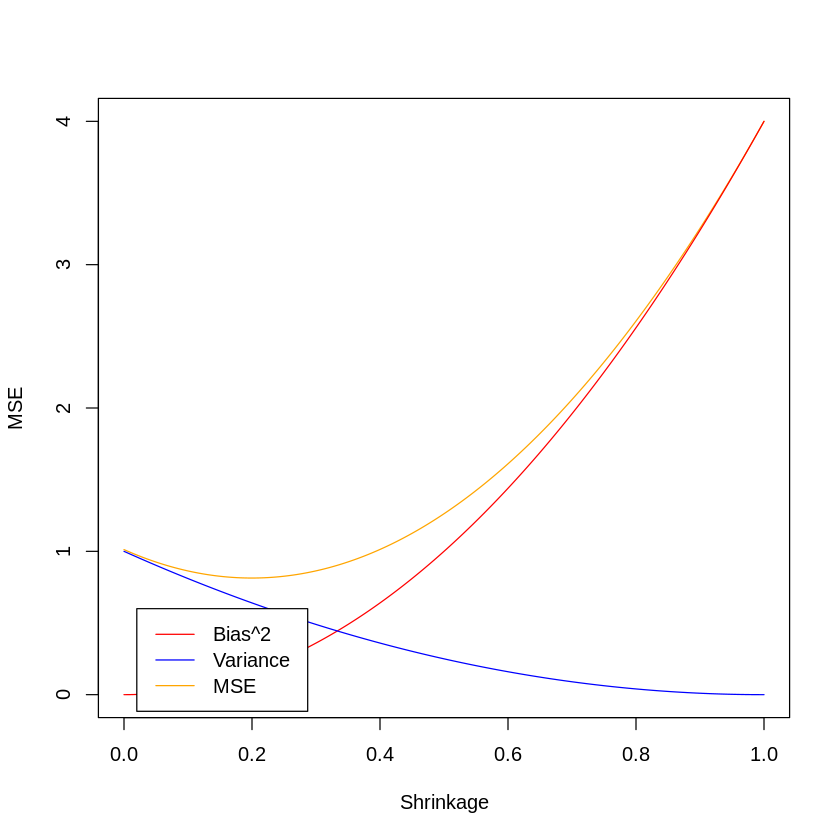

In [57]:
plot(shrink, mse, xlab='Shrinkage', ylab='MSE', type='l', col='orange', ylim=c(0,4))
lines(shrink, bias^2, col='red')
lines(shrink, variance, col='blue')
legend(0.02,0.6, c('Bias^2', 'Variance', 'MSE'), col=c('red', 'blue', 'orange'), lty=c(1,1,1))

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:300%;text-align:justify">
	<font face="XB Zar" size=5>
ب. <a href=https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff>این صفحه</a>  را مطالعه کنید. سپس نموداری که در قسمت الف رسم کردید را با استفاده از آن تحلیل کنید.
<br>
        پاسخ: همانطور که در نمودار نیز مشخص است، در جایی که نمونه‌ها بایاس کمتری دارند، مقدار واریانس بیشتری دارند و نمونه‌هایی که مقدار واریانس کمتری دارند، مقدار بایاس بیشتری دارند. 
        
</form>
</font>
</div>
    </font>
</div>

<div dir = "rtl" style="direction:rtl;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            سوال سوم (لیموشو بدم هلوشو بدم)
        </font>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:300%;text-align:justify">
	<font face="XB Zar" size=5>
        تیم بازاریابی یک شرکت تولید مشروبات غیرالکلی قصد دارد تا میزان تاثیر تبلیغاتی که در سطح جهان(!) انجام داده را بر میزان فروش محصول خود تحلیل کند. برای این‌کار آن‌ها آمار یک‌سال فروش خود را قبل از تبلیغات، و بعد از تبلیغات استخراج کرده ($3.csv$) و از آن‌جایی که کار با این داده‌ها را بلد نیستند، به آن‌ها کمک کنید تا ببینند آیا تبلیغات، در میزان فروش آن‌ها تاثیر داشته یا نه. پاسخ خود را تحلیل کنید. 
</font>
</div>
    </font>
</div>

In [45]:
a <- read.csv(file="3.csv")
t.test(a["before.ad"], a["after.ad"])


	Welch Two Sample t-test

data:  a["before.ad"] and a["after.ad"]
t = -21.21, df = 710.79, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -88.63504 -73.61622
sample estimates:
mean of x mean of y 
 50001.64  50082.76 


<div dir = "rtl" style="direction:rtl;">
	<font face="XB Zar" size=5>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:300%;text-align:justify">
تحلیل: با توجه به مقدار p-value می‌توان گفت که تبلیغات در میزان فروش آن‌ها تاثیر داشته است.
            
</font>
</div>
</div>